In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from upsetplot import from_contents, plot
from matplotlib import pyplot

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

# Set the font to Arial
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [2]:
prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_test/*.tsv"
)

infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_test/*.tsv"
)

In [3]:
prediction_files = prediction_files + infection_prediction_files

In [4]:

from pathlib import Path

all_predictions = []

for prediction_file in prediction_files:

    path = Path(prediction_file)

    panel_type = path.name.split("_")[0]

    predictions = pd.read_csv(
        prediction_file,
        sep="\t",
        index_col=0
    )

    all_predictions.append(predictions)


In [5]:
all_predictions = pd.concat(all_predictions, axis=1)

In [6]:
design_matrix_test = pd.read_csv(
    "../0_data/design_matrix_test.tsv",
    sep='\t'
)

In [7]:
design_matrix_test = design_matrix_test.set_index("injection").join(all_predictions).reset_index()

In [8]:
val_prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_val/*.tsv"
)

val_infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_val/*.tsv"
)

val_prediction_files = val_prediction_files + val_infection_prediction_files

In [9]:
val_prediction_files

['../3_feature_selection_organ_dysfunction/predictions_val/respiratory.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/coag.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/cns.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/renal.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/cardiovasc.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/liver.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_val/sofa.tsv',
 '../4_feature_selection_infection/predictions_val/infection.tsv',
 '../4_feature_selection_infection/predictions_val/abdominal.tsv',
 '../4_feature_selection_infection/predictions_val/sst.tsv',
 '../4_feature_selection_infection/predictions_val/lowerresp.tsv',
 '../4_feature_selection_infection/predictions_val/uti.tsv',
 '../4_feature_selection_infection/predictions_val/ecoli.tsv',
 '../4_feature_selection_infection/predictions_val/bacteremia.tsv']

In [10]:

from pathlib import Path

val_all_predictions = []

for val_prediction_file in val_prediction_files:

    path = Path(val_prediction_file)

    panel_type = path.name.split("_")[0]

    val_predictions = pd.read_csv(
        val_prediction_file,
        sep="\t",
        index_col=0
    )

    val_all_predictions.append(val_predictions)


In [11]:
val_all_predictions = pd.concat(val_all_predictions, axis=1)

In [12]:
design_matrix_val = pd.read_csv(
    "../0_data/design_matrix_validation.tsv",
    sep='\t'
)

In [13]:
design_matrix_val = design_matrix_val.set_index("injection").join(val_all_predictions).reset_index()

In [14]:
hero_prediction_files = glob.glob(
    "../3_feature_selection_organ_dysfunction/predictions_external/*.tsv"
)

hero_infection_prediction_files = glob.glob(
    "../4_feature_selection_infection/predictions_external/*.tsv"
)

hero_prediction_files = hero_prediction_files + hero_infection_prediction_files

In [15]:
hero_prediction_files

['../3_feature_selection_organ_dysfunction/predictions_external/respiratory.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/coag.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/cns.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/renal.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/cardiovasc.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/liver.tsv',
 '../3_feature_selection_organ_dysfunction/predictions_external/sofa.tsv',
 '../4_feature_selection_infection/predictions_external/infection.tsv',
 '../4_feature_selection_infection/predictions_external/abdominal.tsv',
 '../4_feature_selection_infection/predictions_external/sst.tsv',
 '../4_feature_selection_infection/predictions_external/lowerresp.tsv',
 '../4_feature_selection_infection/predictions_external/uti.tsv',
 '../4_feature_selection_infection/predictions_external/ecoli.tsv',
 '../4_feature_selection_infection/prediction

In [16]:

from pathlib import Path

hero_all_predictions = []

for hero_prediction_file in hero_prediction_files:

    path = Path(hero_prediction_file)

    panel_type = path.name.split("_")[0]

    hero_predictions = pd.read_csv(
        hero_prediction_file,
        sep="\t",
        index_col=0
    )

    hero_all_predictions.append(hero_predictions)


In [17]:
hero_all_predictions = pd.concat(hero_all_predictions, axis=1)

In [18]:
design_matrix_hero = pd.read_csv(
    "../0_data/design_matrix_hero.tsv",
    sep='\t'
)

In [19]:
design_matrix_hero = design_matrix_hero.set_index("injection").join(hero_all_predictions).reset_index()

In [20]:
probability_columns = [
    col for col in design_matrix_test.columns if "probability" in col and "sofa" not in col
]
probability_columns

['resp_probability',
 'coag_probability',
 'cns_probability',
 'renal_probability',
 'cardiovasc_probability',
 'liver_probability',
 'infection_probability',
 'abdominal_probability',
 'sst_probability',
 'lowerresp_probability',
 'uti_probability',
 'ecoli_probability',
 'bacteremia_probability']

In [21]:
probability_columns = [
    'resp_probability',
    'cardiovasc_probability',
    'renal_probability',
    'coag_probability',
    'cns_probability',
    'liver_probability',
    'infection_probability',
    'abdominal_probability',
    'lowerresp_probability',
    'bacteremia_probability',
    'ecoli_probability',
    'uti_probability',
    'sst_probability'
]

In [22]:
from umap import UMAP

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

cmap = plt.get_cmap('coolwarm')



In [24]:
from scipy import stats
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

def plot_results(X_input, bootstrap_data):

    bootstrap_counts = []


    for bootstrap_iteration in list(bootstrap_data.keys()):


        mort_range = X_input[bootstrap_iteration].unique()
        mort_range.sort()
        actual_mort = []
        #mort_range = mort_range[:-1]
        counts_per_bin = []
        for val in mort_range:

            counts = X_input[X_input[bootstrap_iteration] == val]['sepsis_or_septic_shock'].value_counts()
            actual_mort.append(counts.get(1, 0) / (counts.get(0, 0) + counts.get(1, 0)))
            counts_per_bin.append(counts.sum())

        estimated_mort = pd.DataFrame(
            {
                "Actual Sepsis Rate": actual_mort,
                "Estimated Sepsis Rate": mort_range,
                "Counts": counts_per_bin
            }
        )

        bootstrap_counts.append(estimated_mort)

    estimated_sepsis = pd.concat(bootstrap_counts)

    # linreg = LinearRegression()

    # linreg.fit(estimated_sepsis[['Estimated Sepsis Rate']], estimated_sepsis[['Actual Sepsis Rate']])

    linregress_results = linregress(estimated_sepsis[['Estimated Sepsis Rate']].values.ravel(), estimated_sepsis[['Actual Sepsis Rate']].values.ravel())
    
    predictions = linregress_results.intercept + linregress_results.slope*estimated_sepsis[['Estimated Sepsis Rate']].values.ravel()

    corr, pval = pearsonr(
        estimated_sepsis[['Estimated Sepsis Rate']].values.ravel(), estimated_sepsis[['Actual Sepsis Rate']].values.ravel()
    )

    return estimated_sepsis, linregress_results, predictions, corr, pval

In [25]:
X_subset = pd.concat(
    [
        design_matrix_test, 
        #design_matrix_val
    ]
)

X_test = pd.concat(
    [
        #design_matrix_hero, 
        design_matrix_val
    ]
)

reducer = UMAP(n_components=2, random_state=42)

components = reducer.fit_transform(X_test[probability_columns])
X_test['UMAP 1'] = components[:, 0]
X_test['UMAP 2'] = components[:, 1]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


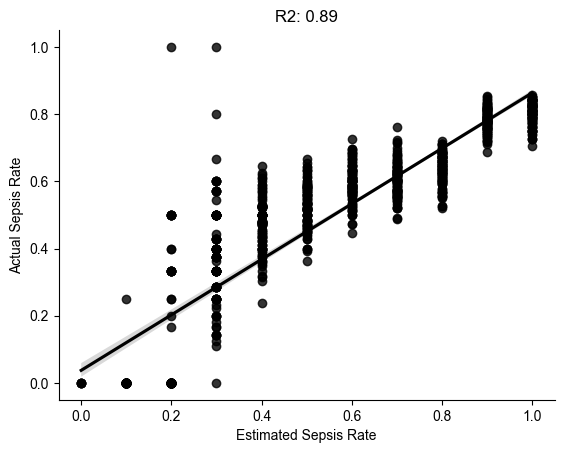

In [26]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

bootstrap_results = {}

from sklearn.utils import shuffle

for bootstrap in range(100):

    X_sample = X_subset.sample(
        frac=0.9,
        replace=False,
        random_state=bootstrap
    )

    protein_scaler = StandardScaler()

    X_sample[probability_columns] = protein_scaler.fit_transform(X_sample[probability_columns])

    X_test_subset = X_test.copy()

    X_test_subset[probability_columns] = protein_scaler.transform(X_test_subset[probability_columns])

    neighbors = NearestNeighbors(
        n_neighbors=10, #round(design_matrix.shape[0] * 0.01),
        metric="euclidean"
        #p=4
    )

    neighbors.fit(X_sample[probability_columns])
    distances, knn_results = neighbors.kneighbors(X_test_subset[probability_columns], return_distance=True)

    neighborhood_sizes = []

    mean_distance = []

    mortality_30s = []
    mortality_30_prob = []


    for i in range(knn_results.shape[0]):

        #if distances[i].max() < distances.mean():

        knn_idx = knn_results[i, :]

        if knn_idx.size > 0:

            neighborhood = X_sample.iloc[knn_idx, :].copy()

            neighborhood_sizes.append(neighborhood.shape[0])

            mean_distance.append(
                distances[i].mean()
            )

            mortality_30 = np.where(neighborhood['sepsis_or_septic_shock'] == 1, 1, 0)

            mortality_probability_30 = mortality_30.sum() / neighborhood.shape[0]

            mortality_30s.append(mortality_30)
            mortality_30_prob.append(mortality_probability_30)

    
    bootstrap_results[f"bootstrap_{bootstrap}"] = mortality_30_prob


X_test_results = pd.concat([X_test,  pd.DataFrame(bootstrap_results)], axis=1)

fig, ax = plt.subplots()

protein_estimated_sepsis, protein_linregress_results, protein_predictions, protein_corr, protein_pval = plot_results(X_test_results, bootstrap_results)


sns.regplot(
    data=protein_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    color="k"
)

ax.set_title(
    f"R2: {protein_linregress_results.rvalue:.2f}"
)

sns.despine()


In [27]:
X_test_results['Sepsis Diagnosis Probability'] = X_test_results[list(bootstrap_results.keys())].mean(axis=1)

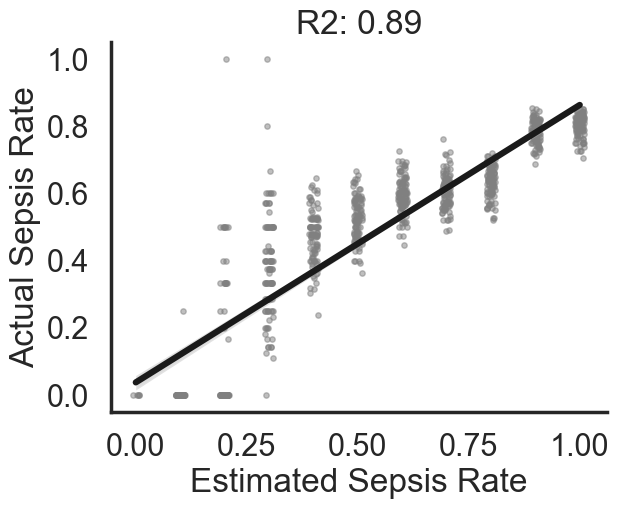

In [28]:
import matplotlib.pyplot as plt

sns.set_theme(context="poster", style="white", font_scale=1)

fig, ax = plt.subplots()

sns.regplot(
    data=protein_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    scatter_kws={"color": "gray", "alpha": 0.5, "s": 15},
    line_kws={"color": "k", "alpha": 1},
    fit_reg=True,
    ci=95,
    x_jitter=0.01
)

ax.set_title(
    f"R2: {protein_corr:.2f}"
)

sns.despine()

In [29]:
ax.figure.savefig(
    "val_eval.pdf", dpi=300, bbox_inches="tight"
)

In [30]:
X_subset = pd.concat(
    [
        design_matrix_test, 
        design_matrix_hero
    ]
)

X_test = pd.concat(
    [
        #design_matrix_hero, 
        design_matrix_val
    ]
)

reducer = UMAP(n_components=2, random_state=42)

components = reducer.fit_transform(X_test[probability_columns])
X_test['UMAP 1'] = components[:, 0]
X_test['UMAP 2'] = components[:, 1]

/srv/data1/home/aaron/envs/miniconda3/envs/revisionenv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


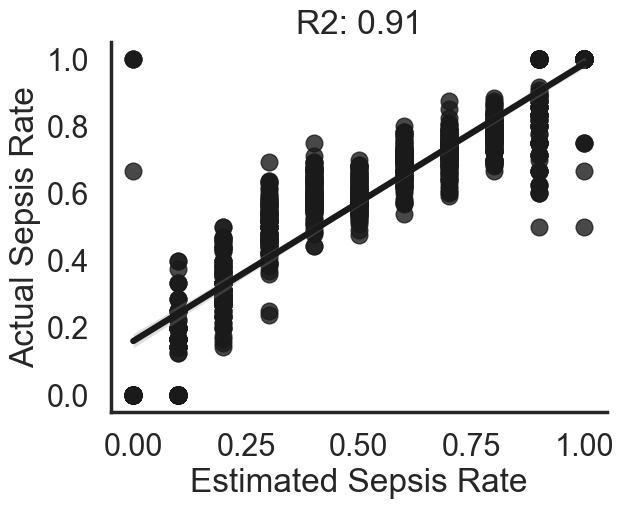

In [31]:
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

bootstrap_results = {}

from sklearn.utils import shuffle

for bootstrap in range(100):

    X_sample = X_subset.sample(
        frac=0.9,
        replace=False,
        random_state=bootstrap
    )

    protein_scaler = StandardScaler()

    X_sample[probability_columns] = protein_scaler.fit_transform(X_sample[probability_columns])

    X_test_subset = X_test.copy()

    X_test_subset[probability_columns] = protein_scaler.transform(X_test_subset[probability_columns])

    neighbors = NearestNeighbors(
        n_neighbors=10, #round(design_matrix.shape[0] * 0.01),
        metric="euclidean"
        #p=4
    )

    neighbors.fit(X_sample[probability_columns])
    distances, knn_results = neighbors.kneighbors(X_test_subset[probability_columns], return_distance=True)

    neighborhood_sizes = []

    mean_distance = []

    mortality_30s = []
    mortality_30_prob = []


    for i in range(knn_results.shape[0]):

        #if distances[i].max() < distances.mean():

        knn_idx = knn_results[i, :]

        if knn_idx.size > 0:

            neighborhood = X_sample.iloc[knn_idx, :].copy()

            neighborhood_sizes.append(neighborhood.shape[0])

            mean_distance.append(
                distances[i].mean()
            )

            mortality_30 = np.where(neighborhood['sepsis_or_septic_shock'] == 1, 1, 0)

            mortality_probability_30 = mortality_30.sum() / neighborhood.shape[0]

            mortality_30s.append(mortality_30)
            mortality_30_prob.append(mortality_probability_30)

    
    bootstrap_results[f"bootstrap_{bootstrap}"] = mortality_30_prob


X_test_results = pd.concat([X_test,  pd.DataFrame(bootstrap_results)], axis=1)

fig, ax = plt.subplots()

combined_estimated_sepsis, combined_linregress_results, combined_predictions, combined_corr, combined_pval = plot_results(X_test_results, bootstrap_results)


sns.regplot(
    data=combined_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    color="k"
)

ax.set_title(
    f"R2: {combined_linregress_results.rvalue:.2f}"
)

sns.despine()


In [32]:
X_test_results['Sepsis Diagnosis Probability'] = X_test_results[list(bootstrap_results.keys())].mean(axis=1)

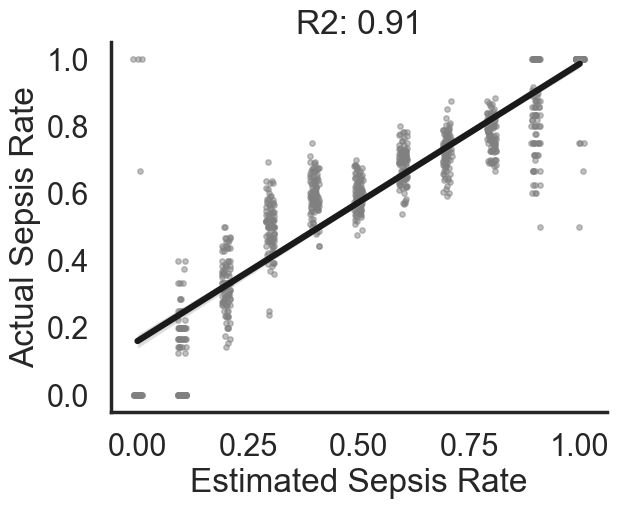

In [33]:
import matplotlib.pyplot as plt

sns.set_theme(context="poster", style="white", font_scale=1)

fig, ax = plt.subplots()

sns.regplot(
    data=combined_estimated_sepsis,
    x="Estimated Sepsis Rate",
    y="Actual Sepsis Rate",
    ax=ax,
    scatter_kws={"color": "gray", "alpha": 0.5, "s": 15},
    line_kws={"color": "k", "alpha": 1},
    fit_reg=True,
    ci=95,
    x_jitter=0.01
)

ax.set_title(
    f"R2: {combined_corr:.2f}"
)

sns.despine()

In [34]:
ax.figure.savefig(
    "combined_eval.pdf", dpi=300, bbox_inches="tight"
)

In [35]:
combined_estimated_sepsis

,Actual Sepsis Rate,Estimated Sepsis Rate,Counts
0,0.000000,0.1,4
1,0.470588,0.2,17
2,0.480000,0.3,25
3,0.555556,0.4,45
4,0.638298,0.5,47
...,...,...,...
6,0.724138,0.6,58
7,0.720930,0.7,43
8,0.730769,0.8,26
9,1.000000,0.9,5


In [36]:
protein_estimated_sepsis

,Actual Sepsis Rate,Estimated Sepsis Rate,Counts
0,0.000000,0.1,1
1,0.000000,0.2,2
2,0.545455,0.3,11
3,0.360000,0.4,25
4,0.666667,0.5,24
...,...,...,...
5,0.608696,0.6,23
6,0.541667,0.7,48
7,0.711864,0.8,59
8,0.780000,0.9,50


In [37]:
def sem(x):
    return x.std() / np.sqrt(len(x))

In [38]:
protein_result = protein_estimated_sepsis[['Actual Sepsis Rate', 'Estimated Sepsis Rate']].groupby('Estimated Sepsis Rate').agg(
    mean_values=('Actual Sepsis Rate', 'mean'),
    sem_values=('Actual Sepsis Rate', sem)
).reset_index()

print(protein_result)

    Estimated Sepsis Rate  mean_values  sem_values
0                     0.0     0.000000    0.000000
1                     0.1     0.003125    0.003125
2                     0.2     0.089226    0.018619
3                     0.3     0.378435    0.015467
4                     0.4     0.472115    0.007812
5                     0.5     0.526466    0.006414
6                     0.6     0.594835    0.005502
7                     0.7     0.606263    0.005120
8                     0.8     0.635720    0.004615
9                     0.9     0.782975    0.003374
10                    1.0     0.804063    0.003394


In [39]:
combined_result = combined_estimated_sepsis[['Actual Sepsis Rate', 'Estimated Sepsis Rate']].groupby('Estimated Sepsis Rate').agg(
    mean_values=('Actual Sepsis Rate', 'mean'),
    sem_values=('Actual Sepsis Rate', sem)
).reset_index()

print(combined_result)

    Estimated Sepsis Rate  mean_values  sem_values
0                     0.0     0.104762    0.050712
1                     0.1     0.112671    0.011720
2                     0.2     0.327917    0.008059
3                     0.3     0.499592    0.007527
4                     0.4     0.598000    0.005740
5                     0.5     0.596420    0.004696
6                     0.6     0.685756    0.005379
7                     0.7     0.725713    0.005307
8                     0.8     0.776724    0.005003
9                     0.9     0.857057    0.012989
10                    1.0     0.984167    0.007272


In [40]:
combined_result['Label'] = "Combined Database"
protein_result['Label'] = "Testing Database"

In [41]:
cr_df = pd.concat(
    [combined_result, protein_result]
)

In [42]:
cr_df

,Estimated Sepsis Rate,mean_values,sem_values,Label
0,0.0,0.104762,0.050712,Combined Database
1,0.1,0.112671,0.011720,Combined Database
2,0.2,0.327917,0.008059,Combined Database
3,0.3,0.499592,0.007527,Combined Database
4,0.4,0.598000,0.005740,Combined Database
5,0.5,0.596420,0.004696,Combined Database
6,0.6,0.685756,0.005379,Combined Database
7,0.7,0.725713,0.005307,Combined Database
8,0.8,0.776724,0.005003,Combined Database
9,0.9,0.857057,0.012989,Combined Database


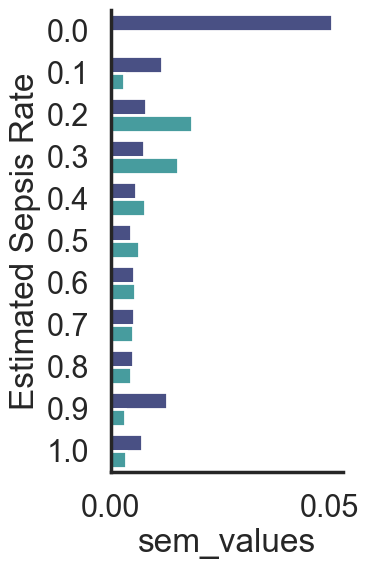

In [43]:
import matplotlib.pyplot as plt

sns.set_theme(context="poster", style="white", font_scale=1)

fig, ax = plt.subplots()

sns.barplot(
    data=cr_df,
    y="Estimated Sepsis Rate",
    x="sem_values",
    hue="Label",
    orient="h",
    ax=ax,
    palette="mako",
    legend=False
)

sns.despine()
fig.set_size_inches((3, 6))

In [44]:
fig.savefig(
    "standard_error.pdf", dpi=300, bbox_inches="tight"
)